In [43]:
import json
import re
import os
import numpy as np
import matplotlib.pyplot as plt


# ---- helper: extract integer from a string ----
def extract_number(text):
    nums = re.findall(r"\b\d+\b", text)
    return int(nums[-1]) if nums else None

# ---- helper: extract nums from a transcript list ----
def parse_transcript(transcript):
    nums = []
    for item in transcript:
        if item.get("role") == "assistant":
            n = extract_number(item.get("content", ""))
            nums.append(n)
    return nums

# ---- main: load transcript_run{1..30}.json ----
def load_all_transcripts(base_path="."):
    results = {}

    for i in range(1, 31):
        filename = f"transcript_run{i}.json"
        path = os.path.join(base_path, filename)

        if not os.path.exists(path):
            print(f"⚠️ File not found: {path}")
            continue

        with open(path, "r", encoding="utf-8") as f:
            transcript = json.load(f)

        results[i] = parse_transcript(transcript)

    return results


# ---- run it ----
all_numbers = load_all_transcripts("/Users/addisonwu/Desktop/llm_sbs_eos_positional_bias/outputs/pd/gpt-4o")

print(all_numbers)

{1: [10, 90, 15, 95, 5, 90, 20, 85, 30, 25, 80, 60, 70, 80, 40, 30, 85, None], 2: [20, 90, 20, 90, 10, 80, 10, 90, 70, 50, 70, 80, 60, 30, 40, 20, 70, None], 3: [20, 95, 5, 90, 10, 90, 10, 95, 30, 85, 70, 50, 75, 30, 60, 20, 75, None], 4: [1, 95, 5, 90, 5, 95, 10, 90, 20, 10, 60, 85, 70, 30, 80, 50, 75, None], 5: [15, 100, 20, 90, 10, 95, 5, 95, 85, 50, 30, 10, 70, 30, 75, 80, 75, None], 6: [20, 90, 10, 95, 5, 90, 15, 85, 50, 10, 70, 85, 60, 30, 75, 40, 75, None], 7: [10, 90, 10, 95, 5, 95, 5, 95, 20, 90, 70, 40, 60, 20, 40, 30, 85, None], 8: [5, 95, 5, 95, 10, 90, 5, 85, 50, 75, 40, 20, 70, 50, 30, 10, 85, None], 9: [50, 90, 20, 95, 10, 90, 10, 95, 85, 60, 80, 50, 70, 30, 20, 10, 75, None], 10: [80, 90, 5, 85, 10, 95, 15, 90, 20, 10, 60, 85, 80, 30, 70, 40, 75, None], 11: [15, 90, 10, 95, 5, 85, 20, 90, 70, 85, 75, 50, 25, 20, 60, 30, 75, None], 12: [20, 90, 10, 90, 20, 95, 30, 90, 40, 10, 70, 85, 80, 50, 70, 30, 75, None], 13: [0, 95, 10, 95, 5, 90, 10, 95, 50, 20, 30, 10, 70, 50, 60

In [44]:
runs = sorted(all_numbers.keys())

even_indices = list(range(0, 16, 2))  # 0,2,...14
odd_indices  = list(range(1, 16, 2))  # 1,3,...15

def collect_by_index(idx):
    return np.array([
        all_numbers[r][idx]
        for r in sorted(all_numbers.keys())
        if all_numbers[r][idx] is not None
    ])

In [45]:
def mean_ci(x, z=1.96):
    mean = np.mean(x)
    sem = np.std(x, ddof=1) / np.sqrt(len(x))
    ci = z * sem
    return mean, ci

In [46]:
even_means = []
even_cis = []

odd_means = []
odd_cis = []

for i in even_indices:
    m, ci = mean_ci(collect_by_index(i))
    even_means.append(m)
    even_cis.append(ci)

for i in odd_indices:
    m, ci = mean_ci(collect_by_index(i))
    odd_means.append(m)
    odd_cis.append(ci)


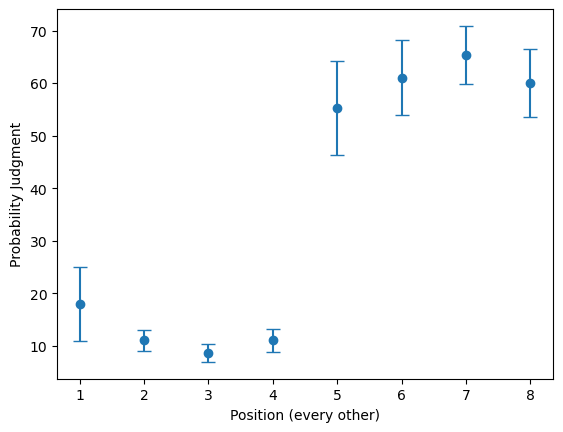

In [47]:
plt.figure()
plt.errorbar(
    range(1, 9),
    even_means,
    yerr=even_cis,
    fmt="o",
    capsize=5
)

plt.xlabel("Position (every other)")
plt.ylabel("Probability Judgment")
#plt.title("Even-Indexed Values (95% CI)")
plt.show()

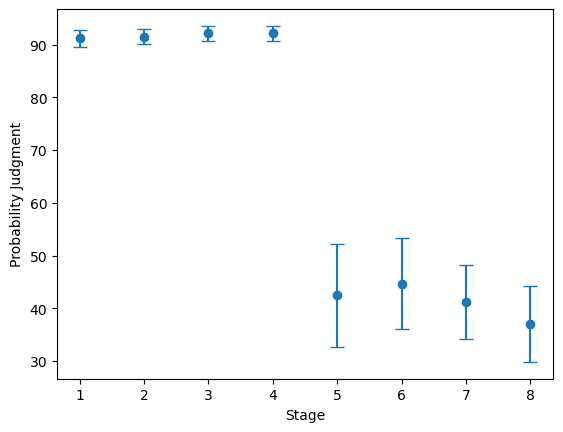

In [48]:
plt.figure()
plt.errorbar(
    range(1, 9),
    odd_means,
    yerr=odd_cis,
    fmt="o",
    capsize=5
)

plt.xlabel("Stage")
plt.ylabel("Probability Judgment")
#plt.title("Odd-Indexed Values (95% CI)")
plt.show()

In [49]:
seventeenth_vals = np.array([
    v[16]
    for v in all_numbers.values()
    if v[16] is not None
])

def mean_ci(x, z=1.96):
    mean = np.mean(x)
    sem = np.std(x, ddof=1) / np.sqrt(len(x))
    ci = z * sem
    return mean, ci

avg_17th, ci_17th = mean_ci(seventeenth_vals)

avg_17th, ci_17th

(77.93103448275862, 2.203040812792619)